<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/Collab---v-3.8/notebooks/T1%20-%203%20-%20Data%20Cleaning%20-%20Plots-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# Plots y visualización de los datos

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [7]:
data = pd.read_csv("/home/sebastianr/GitHub/python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")

In [8]:
data

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


En el caso de usar un notebook usamos %matplotlib inline para que en la celda,
antes de hacer el plot, que automaticamente nos quede en linea

In [9]:
%matplotlib inline 

Para guardar un plot se puede hacer uso de la función savefig

In [ ]:
#savefig("path_donde_guardar_imagen.jpeg")

### Scatter Plot

<Axes: xlabel='Day Mins', ylabel='Day Charge'>

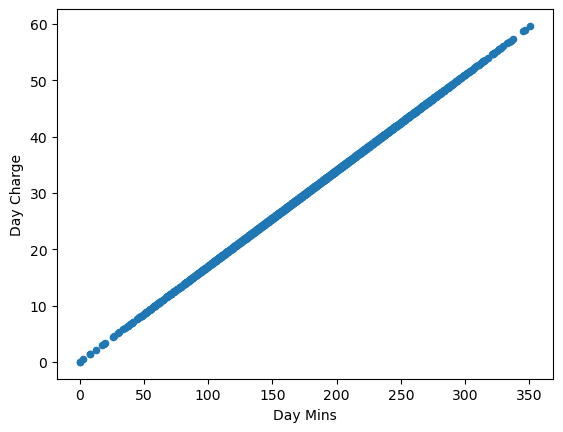

In [10]:
data.plot(kind="scatter", x="Day Mins", y="Day Charge")

<Axes: xlabel='Night Mins', ylabel='Night Charge'>

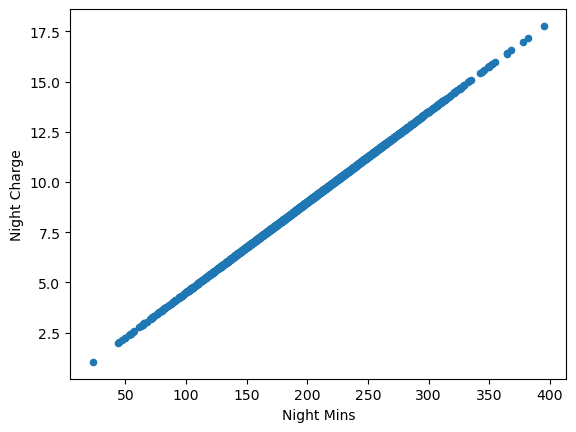

In [11]:
data.plot(kind="scatter", x="Night Mins", y="Night Charge")

* Creo 2 variables figure para hacer el dibujo y otra axs para hacer los ejes
* Éstas quedan signadaspor el paquete  = plot y llamo a la función subplot
* Creamos una matriz de 2 x 2
* ambas variables comparten x e y -> sharey=True y sharex=True  

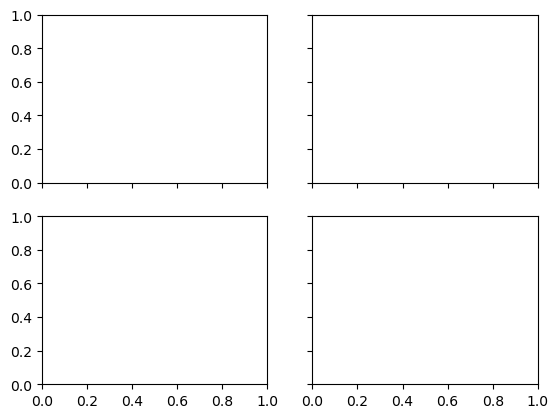

In [12]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)

<Axes: xlabel='Day Mins', ylabel='Day Charge'>

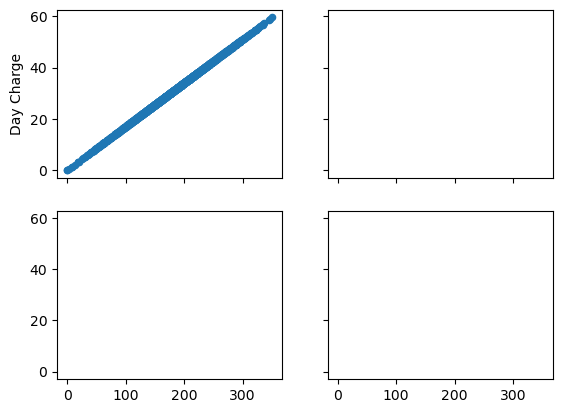

In [13]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
data.plot(kind="scatter", x="Day Mins", y ="Day Charge", ax=axs[0][0])


<Axes: xlabel='Night Calls', ylabel='Night Charge'>

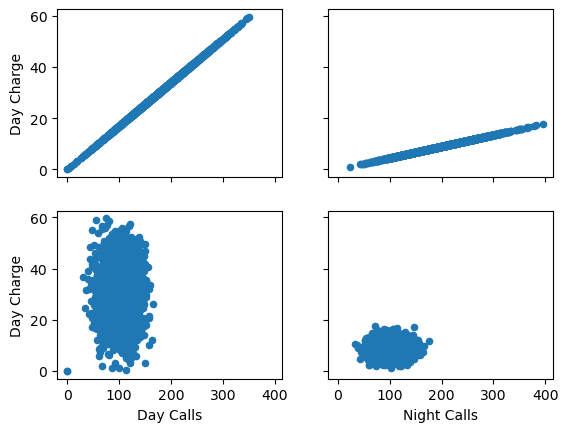

In [14]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
data.plot(kind="scatter", x="Day Mins", y ="Day Charge", ax=axs[0][0])
data.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[0][1])
data.plot(kind="scatter", x="Day Calls", y ="Day Charge", ax=axs[1][0])
data.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1][1])

### Histogramas de frecuencias

Utilizamos la regla de sturges 
La regla de Sturges es una regla que sirve para calcular el número clases o intervalos idóneo en los que se debe dividir un conjunto de datos.

La fórmula de la regla de Sturges establece que el número de clases es igual a uno más el logaritmo en base dos del número total de datos.

c = 1 + log2(N) -> c = 1 + np.log2(N) 

Donde c es el número de clases o intervalos y N es el número total de observaciones de la muestra.

La mayoría de calculadoras solo permiten hacer cálculos con logaritmos de base 10. 

En tal caso, puedes utilizar esta fórmula equivalente: 

c = 1 + log(N) / log(2)

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

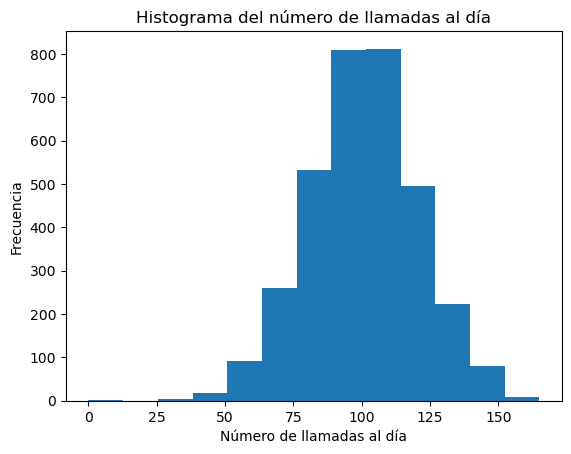

In [15]:
k = int(np.ceil(1+np.log2(3333))) # ceil "redondea hacia arriba"
plt.hist(data["Day Calls"], bins = k) #bins = [0,30,60,...,200]
plt.xlabel("Número de llamadas al día")# pongo etiqueta
plt.ylabel("Frecuencia")# pongo etiqueta
plt.title("Histograma del número de llamadas al día")

### Boxplot, diagrama de caja y bigotes
Visualización básica de un dataset

La caja es lo mas importánte que indica dónde están la gran mayoría de los datos
los cuantiles sirven para ordenar dividiendo, donde se organiza la información.

En un diagrama de caja y bigotes, la caja espieza en el lugar que ocupe el 25% despues de ser ordenado por tanto por debajo del borde inferior de la caja quedan 1/4 de los datos, y el borde superior de la caja define el perceptil 75,
es decir que por encima de el quedan el 25% de los datos mas grandes.

Esto significa que la caja abarca el 50% de la distribución exactamente en la mitad de los datos, 

Y en particuar la raya amarilla( 50%=101) es la mediana o el perceptil 50


Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

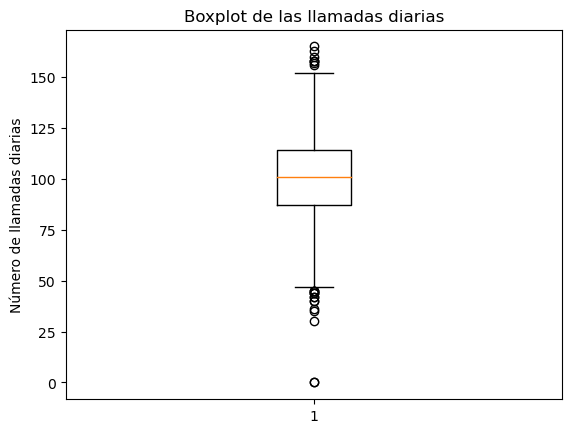

In [16]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Número de llamadas diarias")
plt.title("Boxplot de las llamadas diarias")

In [17]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

el 75% - el 25% me da el rango intercuartílico que es la altura, el tamaño de la caja las 2 rayitas 1arriba y 1abajo respectivamente, es el bigote, se coloca siempre a 1.5 veces el rango intercuartílico como max, puede lllegar al min o al max, en un boxplot si hay valores mas alla de 1.5 veces el rango intercuartílico, se pintan como circulitos. 

Se les llama "Outlier".

In [18]:
# Inter Quartil Range
IQR=data["Day Calls"].quantile(0.75)-data["Day Calls"].quantile(0.25)
IQR

27.0

In [19]:
data["Day Calls"].quantile(0.25) - 1.5*IQR
# 46.5 es justo donde acaba el bigote

46.5

In [ ]:
data["Day Calls"].quantile(0.75) + 1.5*IQR
# 154.5 hasta donde lllaga el bigoe superior

154.5